<a href="https://colab.research.google.com/github/kdovin/project_Lovely-G.4_none/blob/main/%EA%B0%90%EA%B7%A4%EC%B0%A9%EA%B3%BC%EB%9F%89_2%EC%B0%A8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

In [722]:
#데이터 불러오기
df_train = pd.read_csv('/content/drive/MyDrive/데이터/감귤착과량/train.csv') #모델 학습 파일
df_test = pd.read_csv('/content/drive/MyDrive/데이터/감귤착과량/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/데이터/감귤착과량/sample_submission.csv') #답안지 파일

In [723]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [724]:
df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [725]:
submission.head()

,ID,착과량(int)
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


- ID : 각 데이터 구별 아이디
- 착과량(int) : 감귤 열매 수량
- 수고(m) : 나무의 높이
- 수관폭1(min) : 최소 가로 길이
- 수관폭2(max) : 최대 가로 길이
- 수관폭평균 : 평균 가로 길이

In [726]:
print(df_train.shape)
print(df_test.shape)
print(submission.shape)

(2207, 184)
(2208, 183)
(2208, 2)


In [727]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [728]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Columns: 183 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), object(1)
memory usage: 3.1+ MB


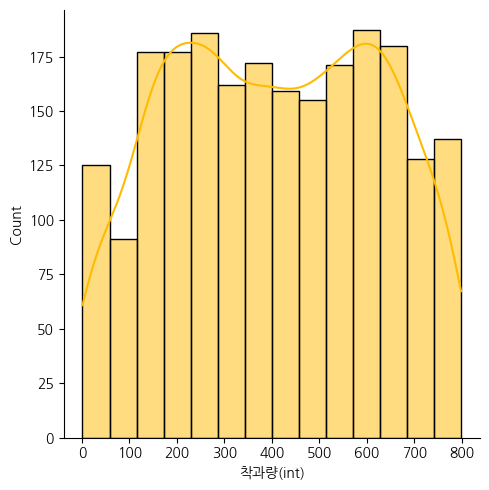

In [729]:
#착과량 분포
sns.displot(data=df_train, x='착과량(int)', kde=True,color='#FFBB00');

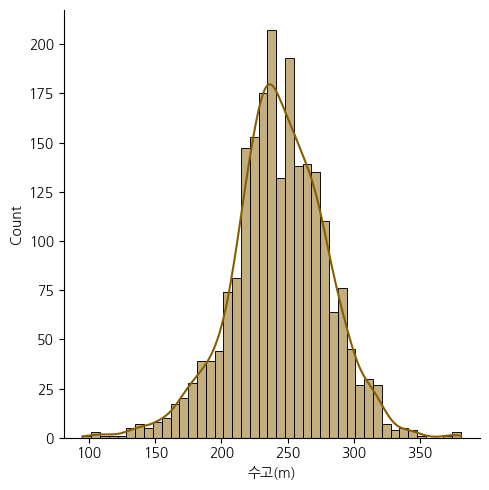

In [730]:
#수고 분포
sns.displot(data=df_train, x='수고(m)', kde=True,color='#875E00');

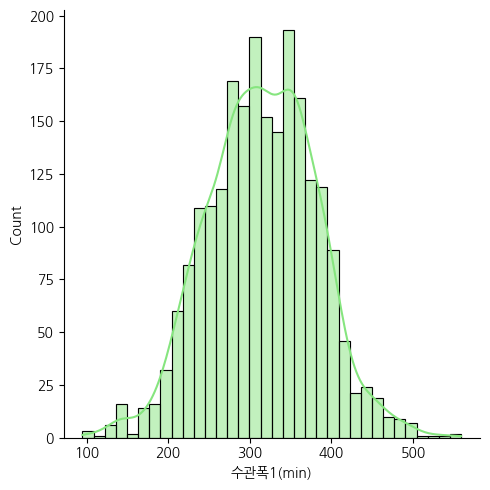

In [731]:
#수관폭1의 분포
sns.displot(data=df_train, x='수관폭1(min)', kde=True,color='#86E57F');

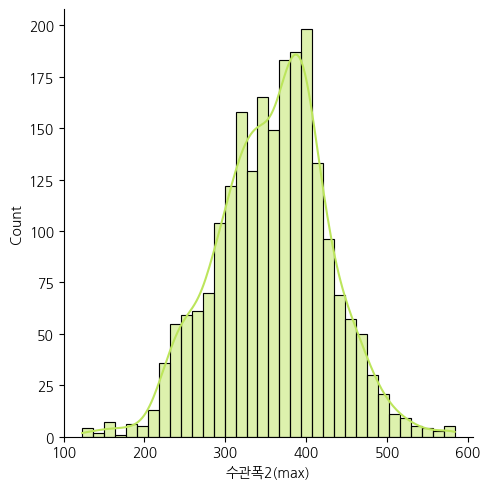

In [732]:
#수관폭2의 분포
sns.displot(data=df_train, x='수관폭2(max)', kde=True,color='#BCE55C');

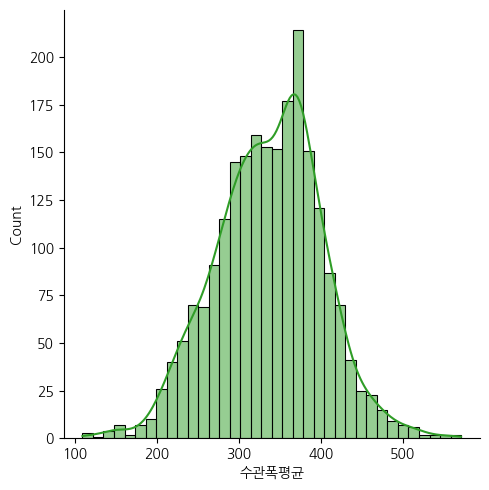

In [733]:
#수관폭평균의 분포
sns.displot(data=df_train, x='수관폭평균', kde=True,color='#2F9D27');

<Axes: xlabel='수고(m)', ylabel='착과량(int)'>

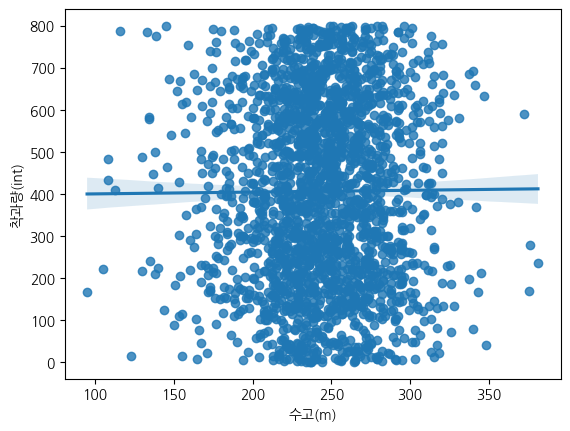

In [734]:
#수고와 착과량의 선형 회귀
sns.regplot(data=df_train, x='수고(m)', y="착과량(int)")
#관계성을 찾기 어렵다.

<Axes: xlabel='수관폭1(min)', ylabel='착과량(int)'>

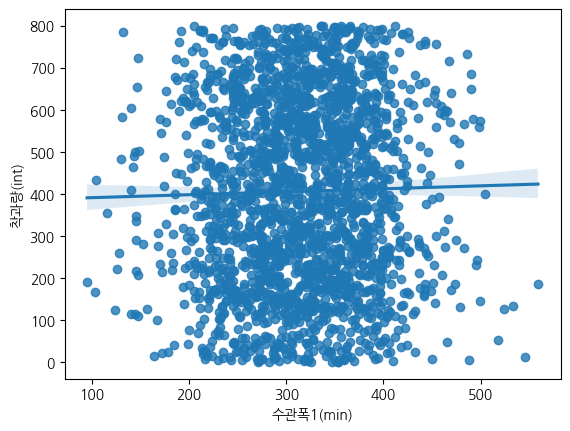

In [735]:
#수관폭1과 착과량의 선형 회귀
sns.regplot(data=df_train, x='수관폭1(min)', y="착과량(int)")
#관계성을 찾기 어렵다.

<Axes: xlabel='수관폭2(max)', ylabel='착과량(int)'>

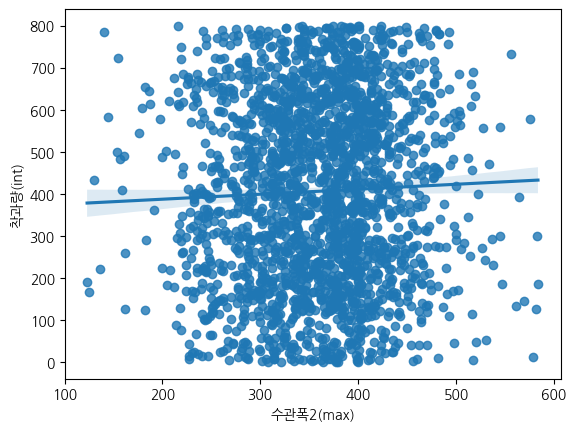

In [736]:
#수관폭2와 착과량의 선형 회귀
sns.regplot(data=df_train, x='수관폭2(max)', y="착과량(int)")
#관계성을 찾기 어렵다.

<Axes: xlabel='수관폭평균', ylabel='착과량(int)'>

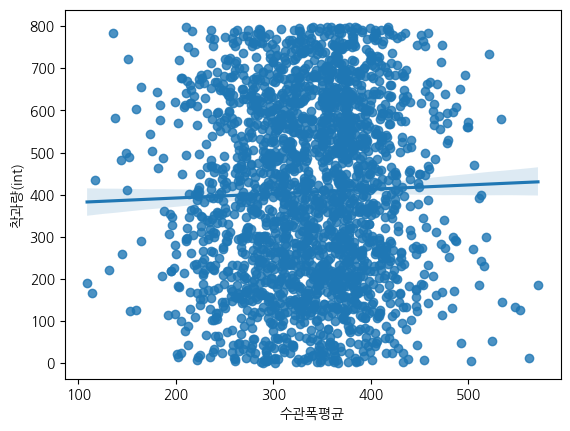

In [737]:
#수관폭평균과 착과량의 선형 회귀
sns.regplot(data=df_train, x='수관폭평균', y="착과량(int)")
#관계성을 찾기 어렵다.

In [738]:
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,...,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순mean,엽록소mean
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,78.336504,78.243462,78.166501,78.127526,...,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251,1.693258,74.108328
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,80.116691,79.974397,79.890399,79.709278,...,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600,1.861798,74.903549
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,79.118529,78.941452,78.928197,78.741878,...,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578,1.762921,74.678107
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,77.936262,77.839523,77.815607,77.644644,...,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970,1.857303,73.496323
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,76.233231,76.186572,76.031032,75.886553,...,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093,2.125843,71.791156


In [739]:
# find the columns that header contain '새순'
new_columns = []
for col in df_train.columns:
    if '새순' in col:
        new_columns.append(col)

# find the columns that header contain '엽록소'
new_columns_2 = []
for col in df_train.columns:
    if '엽록소' in col:
        new_columns_2.append(col)

# mean value of columns that header contain '새순'
new_columns_mean = df_train[new_columns].mean(axis=1)
new_columns_mean_2 = df_test[new_columns].mean(axis=1)

# add new columns
df_train['새순mean'] = new_columns_mean
df_test['새순mean'] = new_columns_mean_2

# std value of columns that header contain '새순'
new_columns_std = df_train[new_columns].std(axis=1)
new_columns_std_2 = df_test[new_columns].std(axis=1)

# add new columns
df_train['새순std'] = new_columns_std
df_test['새순std'] = new_columns_std_2

# min value of columns that header contain '새순'
new_columns_min = df_train[new_columns].min(axis=1)
new_columns_min_2 = df_test[new_columns].min(axis=1)

# add new columns
df_train['새순min'] = new_columns_min
df_test['새순min'] = new_columns_min_2

# max value of columns that header contain '새순'
new_columns_max = df_train[new_columns].max(axis=1)
new_columns_max_2 = df_test[new_columns].max(axis=1)

# add new columns
df_train['새순max'] = new_columns_max
df_test['새순max'] = new_columns_max_2

# 1st quartile range of columns that header contain '새순'
new_columns_q1 = df_train[new_columns].quantile(axis=1, q=0.25)
new_columns_q1_2 = df_test[new_columns].quantile(axis=1, q=0.25)

# add new columns
df_train['새순_q1'] = new_columns_q1
df_test['새순_q1'] = new_columns_q1_2

# 3rd quartile range of columns that header contain '새순'
new_columns_q3 = df_train[new_columns].quantile(axis=1, q=0.75)
new_columns_q3_2 = df_test[new_columns].quantile(axis=1, q=0.75)

# add new columns
df_train['새순_q3'] = new_columns_q3
df_test['새순_q3'] = new_columns_q3_2

# drop columns that header contain '새순'
df_train = df_train.drop(new_columns, axis=1)
df_test = df_test.drop(new_columns, axis=1)

# drop columns that header contain '엽록소'
df_train = df_train.drop(new_columns_2, axis=1)
df_test = df_test.drop(new_columns_2, axis=1)

<Axes: xlabel='새순mean', ylabel='착과량(int)'>

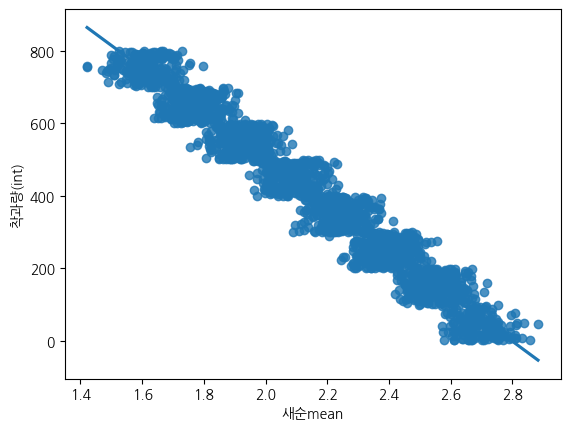

In [740]:
#새순mean과 착과량의 선형 회귀
sns.regplot(data=df_train, x='새순mean', y="착과량(int)")

#새순이 작을 수록 착과량이 높다.

<Axes: >

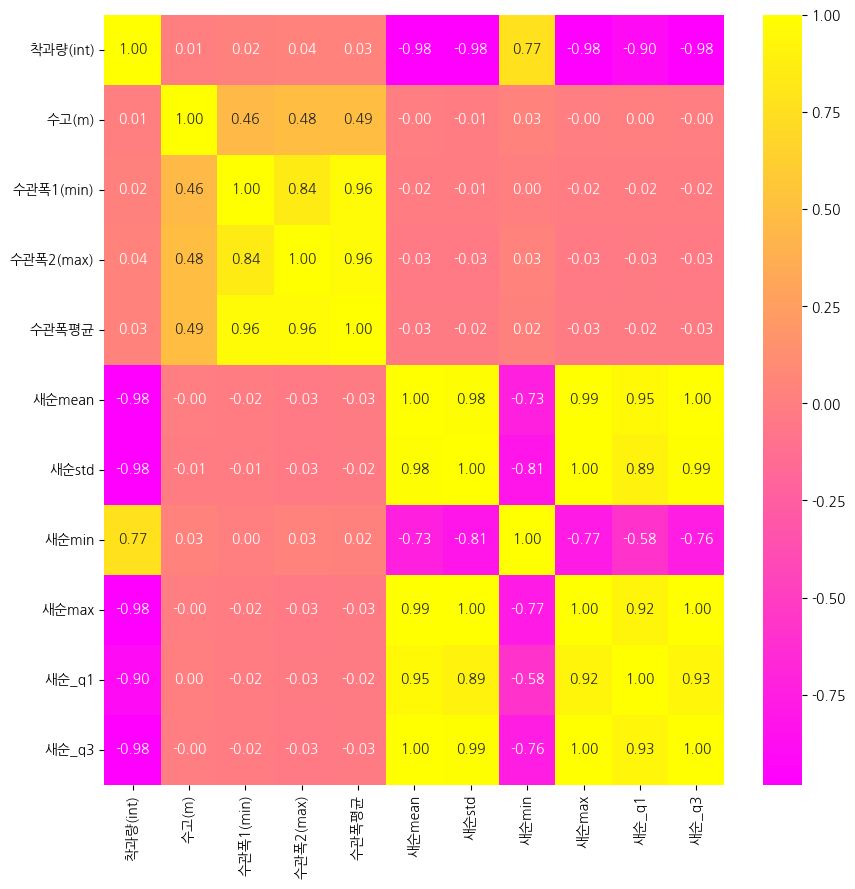

In [741]:
#상관계수 확인
corr = df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='spring')

In [742]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순min,새순max,새순_q1,새순_q3
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,1.693258,0.638143,0.6,2.8,1.1,2.2
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,1.861798,0.894491,0.0,3.3,1.2,2.6
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,1.762921,0.712611,0.5,3.0,1.2,2.4
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,1.857303,0.692802,0.7,3.1,1.3,2.4
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2.125843,0.898171,0.6,3.7,1.4,2.9


In [746]:
df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순min,새순max,새순_q1,새순_q3
0,TEST_0000,231.0,219.0,302.0,260.5,2.330337,1.139618,0.0,4.3,1.4,3.3
1,TEST_0001,206.0,324.0,346.0,335.0,1.576404,0.562467,0.6,2.5,1.1,2.0
2,TEST_0002,282.0,373.0,404.0,388.5,2.569663,1.276216,0.0,4.7,1.5,3.6
3,TEST_0003,234.0,337.0,357.0,347.0,2.094382,0.938248,0.0,3.6,1.3,2.9
4,TEST_0004,222.0,329.0,347.0,338.0,1.692135,0.613156,0.7,2.7,1.2,2.2


In [743]:
# 여러번 반복할 수 있도록 함수 따로 원본 저장
original_train = df_train
original_test = df_test

# 첫 번째 열(ID) 제외
df_train = df_train.drop(columns = ['ID'])

In [744]:
# 분산팽창계수(VIF) 확인해보기!

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_train['Intercept'] = 1
# 상수항을 추가함으로써 모델이 항상 절편을 고려하게 되어, 각 독립 변수가 선형 종속이더라도 공분산 행렬이 올바르게 형성되어 다중공선성을 평가할 수 있게 됨.

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_train.columns
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]

# 결과 출력
print(vif_data)

     Variable          VIF
0    착과량(int)    27.435788
1       수고(m)     1.326533
2   수관폭1(min)          inf
3   수관폭2(max)          inf
4       수관폭평균          inf
5      새순mean   426.102580
6       새순std   333.322041
7       새순min     5.186265
8       새순max   510.299058
9       새순_q1    19.809217
10      새순_q3   342.036859
11  Intercept  1459.845922


In [745]:
exclude_v = ['수관폭1(min)','수관폭2(max)','수관폭평균']

# 선택된 변수들을 제외한 나머지 변수들을 가진 데이터프레임 생성
df_train = df_train.drop(exclude_v, axis=1)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_train.columns
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]

# 결과 출력
print(vif_data)

    Variable          VIF
0   착과량(int)    27.415548
1      수고(m)     1.003028
2     새순mean   425.921593
3      새순std   332.885493
4      새순min     5.185733
5      새순max   510.052169
6      새순_q1    19.791273
7      새순_q3   341.797317
8  Intercept  1456.786671


In [748]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Target과 Features 정의
X = df_train.drop(columns=['착과량(int)'])
y = df_train['착과량(int)']

# Train set과 Validation set으로 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델
rf = RandomForestRegressor()

# 탐색할 하이퍼파라미터
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 탐색을 통한 최적 하이퍼파라미터 검색
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델
best_rf = grid_search.best_estimator_

# 최적의 모델로 Validation set 예측
y_pred = best_rf.predict(X_val)

# 모델 적합도 평가 (Mean Absolute Error)
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:", mae)

# NMAE 지표 계산
nmae = mae / df_train['착과량(int)'].mean()
print("Normalized Mean Absolute Error (NMAE):", nmae)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error: 32.67565411320651
Normalized Mean Absolute Error (NMAE): 0.0804378295364998
